In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('simulation_results.csv')
df

,theta_rad,phi_rad,gain_db
0,0.000000,-3.14159,-20.0
1,0.062832,-3.14159,-20.0
2,0.125664,-3.14159,-20.0
3,0.188496,-3.14159,-20.0
4,0.251327,-3.14159,-20.0
...,...,...,...
4995,2.827430,3.07876,-20.0
4996,2.890270,3.07876,-20.0
4997,2.953100,3.07876,-20.0
4998,3.015930,3.07876,-20.0


In [34]:
df2 = df[df.phi_rad == -3.14159]
df2['theta_deg'] = df2['theta_rad']*180/np.pi
df2['phi_deg'] = df2['phi_rad']*180/np.pi
df2.head()

/var/folders/sv/3m4f916j10q_61lts8j15p7m0000gn/T/ipykernel_11285/2546482575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['theta_deg'] = df2['theta_rad']*180/np.pi
/var/folders/sv/3m4f916j10q_61lts8j15p7m0000gn/T/ipykernel_11285/2546482575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['phi_deg'] = df2['phi_rad']*180/np.pi


,theta_rad,phi_rad,gain_db,theta_deg,phi_deg
0,0.000000,-3.14159,-20.0,0.000000,-179.999848
1,0.062832,-3.14159,-20.0,3.600003,-179.999848
2,0.125664,-3.14159,-20.0,7.200017,-179.999848
3,0.188496,-3.14159,-20.0,10.800025,-179.999848
4,0.251327,-3.14159,-20.0,14.399976,-179.999848


In [26]:
# def get_directive_gain(g, minDdBi=-20):
#     """Return the "directive gain" of the antenna array producing gain g."""
#     DdBi = 10 * np.log10(g / np.max(g))
#     return np.clip(DdBi, minDdBi, None)

# mmm = get_directive_gain(df.gain_db)

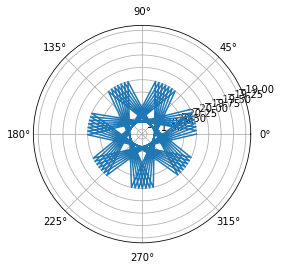

In [54]:
plt.polar(df2.theta_deg,df2.gain_db)

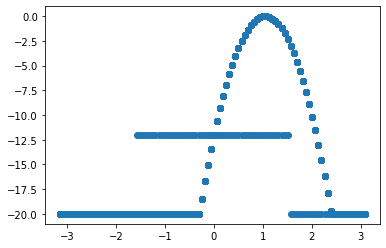

In [44]:
plt.scatter(df.phi_rad,df.gain_db)

[0.         0.00628947 0.01257895 0.01886842 0.0251579  0.03144737
 0.03773685 0.04402632 0.0503158  0.05660527 0.06289475 0.06918422
 0.0754737  0.08176317 0.08805265 0.09434212 0.1006316  0.10692107
 0.11321055 0.11950002 0.1257895  0.13207897 0.13836845 0.14465792
 0.15094739 0.15723687 0.16352634 0.16981582 0.17610529 0.18239477
 0.18868424 0.19497372 0.20126319 0.20755267 0.21384214 0.22013162
 0.22642109 0.23271057 0.23900004 0.24528952 0.25157899 0.25786847
 0.26415794 0.27044742 0.27673689 0.28302637 0.28931584 0.29560531
 0.30189479 0.30818426 0.31447374 0.32076321 0.32705269 0.33334216
 0.33963164 0.34592111 0.35221059 0.35850006 0.36478954 0.37107901
 0.37736849 0.38365796 0.38994744 0.39623691 0.40252639 0.40881586
 0.41510534 0.42139481 0.42768429 0.43397376 0.44026323 0.44655271
 0.45284218 0.45913166 0.46542113 0.47171061 0.47800008 0.48428956
 0.49057903 0.49686851 0.50315798 0.50944746 0.51573693 0.52202641
 0.52831588 0.53460536 0.54089483 0.54718431 0.55347378 0.5597

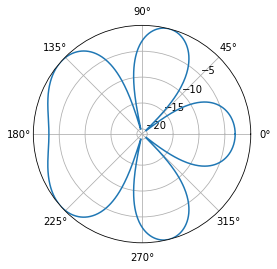

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def gain(d, w):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    A = w[0] + w[1]*np.exp(1j*psi)
    g = np.abs(A)**2
    return phi, g

def get_directive_gain(g, minDdBi=-20):
    """Return the "directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

# Wavelength, antenna spacing, feed coefficients.
lam = 1
d = lam
w = np.array([1, -1j])
# Calculate gain and directive gain; plot on a polar chart.
phi, g = gain(d, w)
print(phi)
DdBi = get_directive_gain(g)

plt.polar(phi, DdBi)
ax = plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.show()


In [57]:
df.theta_rad.max()

3.07876